# QDC to energy calibration using Compton edge from $\gamma$ sources with 1 p.e. threshold
## KETEK detector
last edit Jan-16, 2022

## Imports and definitions

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
from my_tools               import *; 
from plot_tools             import *;
from my_data_analysis_tools import *;
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [2]:
main_data_path = '/Users/erezcohen/Desktop/data/PETsys/BoxSi_proto2.2/vth_1PE/KETEK_QDC_calibration_using_gamma_sources/'

In [3]:
measurement_names  = ['Bkg'                 ,'Cs137'          ,'Co60'                  ,'Na22'               , 'Th232'    ]
measurement_labels = ['Background'          ,'$^{137}$Cs'     ,'$^{60}$Co'             ,'$^{22}$Na'          ,'$^{228}$Th']
colors             = ['k'                   ,'royalblue'      ,'forestgreen'           ,'salmon'             , 'black'   ]
source_E_keV       = np.array([np.array([]) , np.array([662]) , np.array([1173,1332])  ,np.array([511,1274]) ,np.array([2615])])
m_e                = 511 # keV
source_CE_keV      = 2*np.square(source_E_keV)/(2*source_E_keV + m_e) ;
dTs                = [100                   ,100              , 100                    ,100                  ,400] # sec

/var/folders/42/n5_htl9n34j9wpgd5rqsnmv40000gn/T/ipykernel_3208/338740624.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  source_E_keV       = np.array([np.array([]) , np.array([662]) , np.array([1173,1332])  ,np.array([511,1274]) ,np.array([2615])])


## load data

In [4]:
events = dict()
for measurement_name,measurement_label,dT in zip(measurement_names,measurement_labels,dTs):
    filename = 'only_KETEK_vth12e_5_' + measurement_name + '_%dsec'%dT + '_events.csv'
    events[measurement_label] = pd.read_csv( main_data_path + filename )
print('done loading data')

done loading data


## auxiliary

In [5]:
def plot_step_hist( x_arr, bins=np.linspace(0,1,10), label="", color='k', ScaleFactor=1,
                   density=False,capsize=2, capthick=2,marker='o',linewidth=2):
    h,edges = np.histogram( x_arr, bins=bins )
    h_err = np.sqrt(h)

    if density==True:
        h_err = h_err/np.sum(h)
        h     = h / np.sum(h)

    h     = h*ScaleFactor
    h_err = h_err*ScaleFactor
    x     = (edges[1:] + edges[:-1])/2
    x_err = (edges[1:] - edges[:-1])/2
    plt.step ( x, h, color=color, where='mid', label=None ) 
    plt.errorbar ( x=x, xerr=x_err, y=h, yerr=h_err, 
                  color=color, marker=marker, linestyle='None',label=label, 
                  capsize=capsize, capthick=capthick, linewidth=linewidth )
    return x,h,x_err,h_err

In [6]:
def calib_func(QDC, a, b):    
    return a+b*QDC

## plot

In [7]:
source_CE_ch       = np.array([np.array([]) , np.array([2.5]) , np.array([22,29])  ,np.array([0.5,27]), np.array([76.])])
source_CE_ch_err   = np.array([np.array([]) , np.array([1.5]) , np.array([1,1])    ,np.array([0.5,1]),  np.array([2.])])

/var/folders/42/n5_htl9n34j9wpgd5rqsnmv40000gn/T/ipykernel_3208/1904508457.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  source_CE_ch       = np.array([np.array([]) , np.array([2.5]) , np.array([22,29])  ,np.array([0.5,27]), np.array([76.])])
/var/folders/42/n5_htl9n34j9wpgd5rqsnmv40000gn/T/ipykernel_3208/1904508457.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  source_CE_ch_err   = np.array([np.array([]) , np.array([1.5]) , np.array([1,1])    ,np.array([0.5,1]),  np.array([2.])])


In [8]:
QDC_bins = np.linspace(0,95,96) # same bins for all histograms for background subtraction
QDC_lims = [(0,30),(0,30),(0,50),(0,50),(30,95)]

In [9]:
QDC = np.linspace(0,80,300)
a = 400
b = 25.5

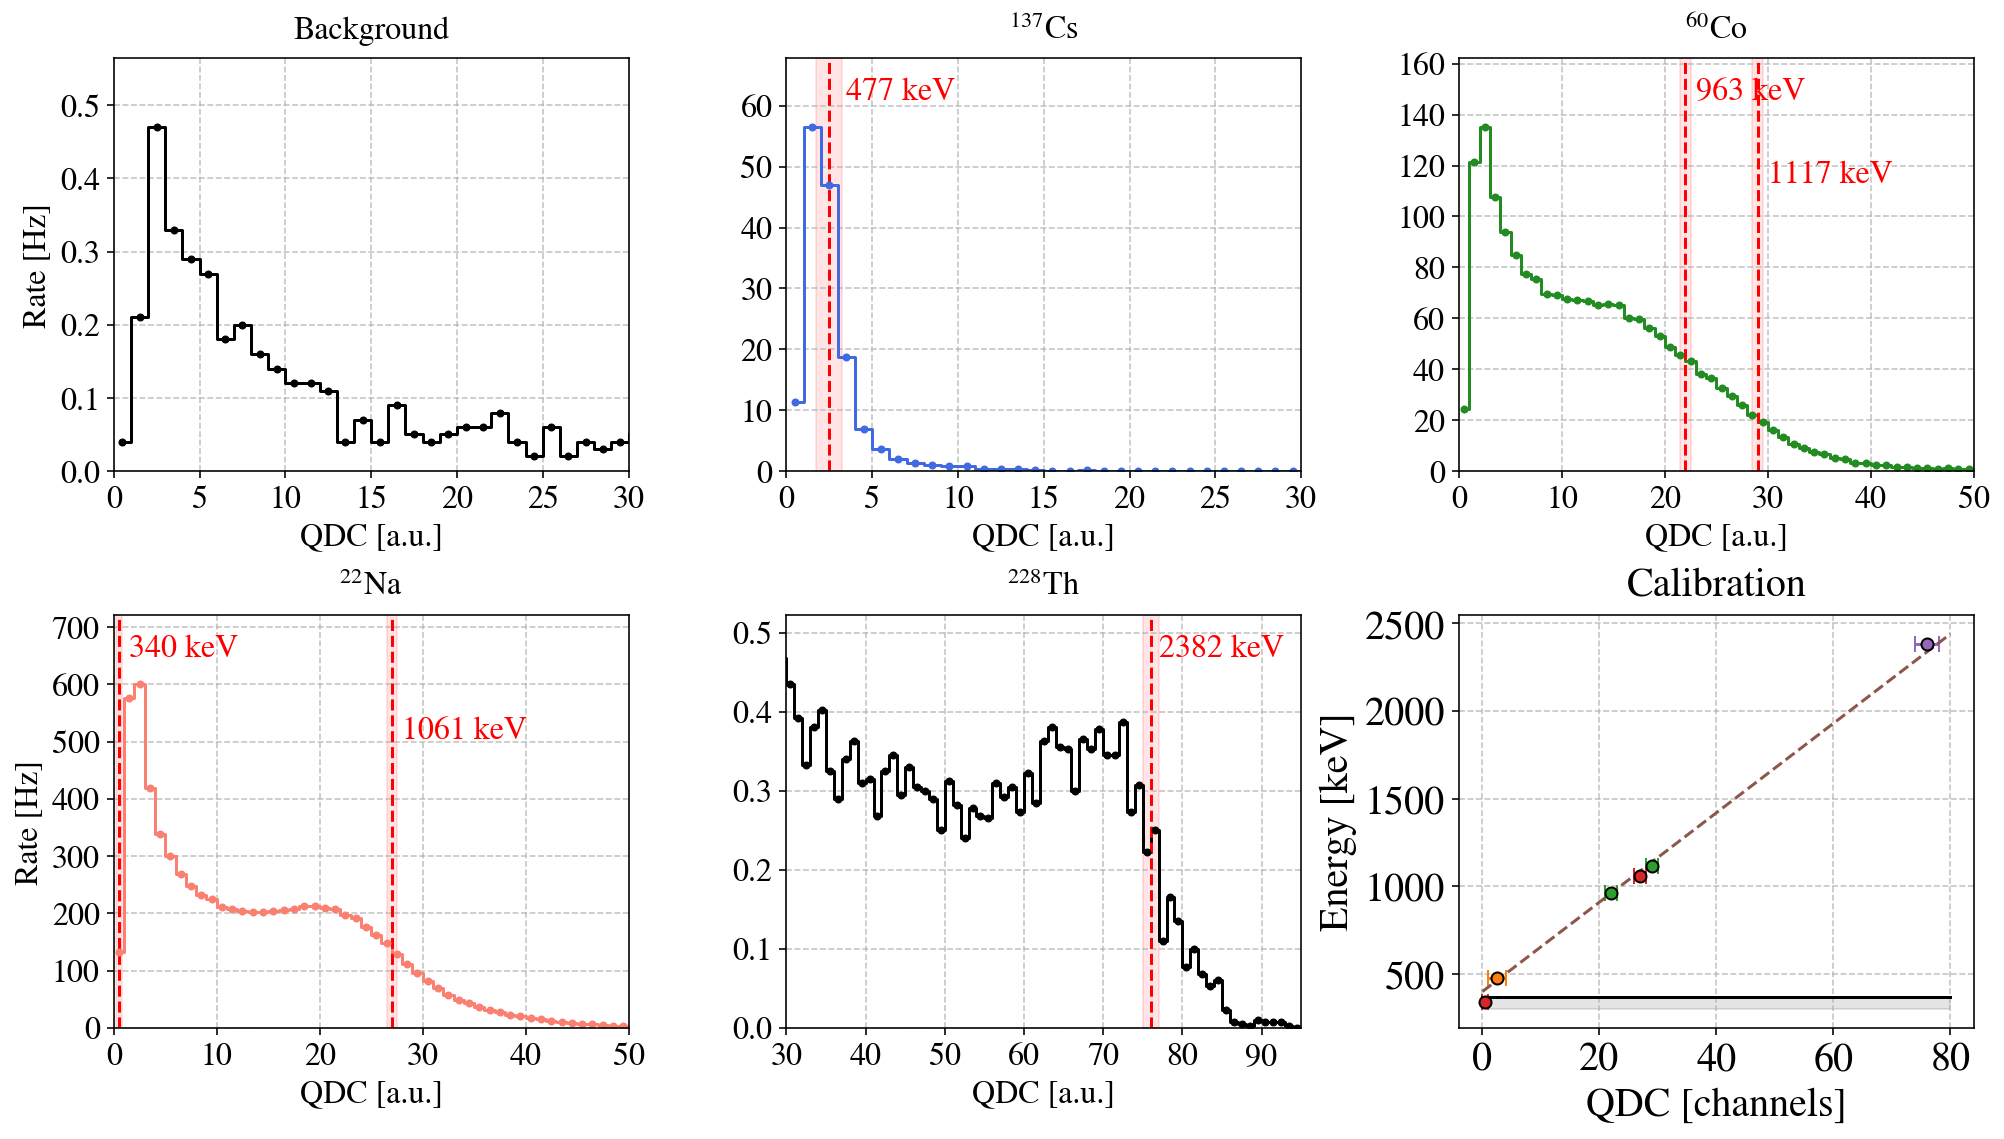

In [10]:
h,herr = dict(),dict()

fig = plt.figure(figsize=(14,8))
for (measurement_name,measurement_label,
     color,subplot_idx,
     CE_ch,CE_ch_err,CE_keV,
     xlim,dT) in zip(measurement_names,measurement_labels,                                                  
                  colors,range(len(colors)),                  
                  source_CE_ch,source_CE_ch_err,source_CE_keV,
                  QDC_lims,dTs):#{

    ax = fig.add_subplot(2,3,subplot_idx+1)
    evts = events[measurement_label]
    
    x,h[measurement_label],x_err,herr[measurement_label] = plot_step_hist(evts['Qtot[a.u.]'],bins=QDC_bins,color=color,
                                                                          density=False,ScaleFactor=1./dT,
                                                                          label=measurement_label,
                                                                          capsize=0,capthick=0,marker='.',linewidth=0)    
    ymax = 1.2*np.max(h[measurement_label][np.min(xlim):np.max(xlim)])
    set_axes(ax,'QDC [a.u.]' ,#if subplot_idx>1 else '',
             'Rate [Hz]' if subplot_idx==0 or subplot_idx==3 else '',
             remove_ticks_x=False, # if subplot_idx>1 else True, 
             xlim=xlim, ylim=(0,ymax),
             title=measurement_label,
             do_add_grid=True,do_add_legend=False,fontsize=16);
    
    # Compton edges
    for CE,CE_err,E,CE_idx in zip(CE_ch,CE_ch_err,CE_keV,range(len(CE_keV))):
        plt.plot([CE,CE],[0,ymax],'--r')
        plt.fill_betweenx([0,ymax],CE-CE_err/2,CE+CE_err/2,color='r',alpha=0.1)
        ytext = (0.9-0.2*CE_idx)*ymax
        plt.text(CE+1,ytext,'%d keV'%E,color='r', fontsize=16)
    #}    
    
    
ax = fig.add_subplot(2,3,6)
for (measurement_name,measurement_label,
     color,subplot_idx,
     CE_ch,CE_ch_err,CE_keV) in zip(measurement_names,measurement_labels,                          
                          colors,range(len(colors)),
                          source_CE_ch,source_CE_ch_err,source_CE_keV):#{

    plt.errorbar ( x=CE_ch , y=CE_keV, xerr=CE_ch_err , label=measurement_label,
                  marker='o', markeredgecolor='k', linestyle='None', capsize=4) 
    
plt.plot( QDC , calib_func(QDC,a,b) ,'--' ,label='%.0f keV + %.1f QDC'%(a,b))
plt.plot( [0,np.max(QDC)],[370,370] ,'-k' , label='detection threshold')
plt.fill_between( [0,np.max(QDC)],[300,300],[370,370] ,color='k' , label=None, alpha=0.1)
set_axes(ax,'QDC [channels]','Energy [keV]',
         title='Calibration',
         do_add_grid=True,do_add_legend=False,fontsize=20);
# plt.legend(bbox_to_anchor=(1.5,1.),fontsize=18,loc='best')    

plt.tight_layout()


## Reproduce plot without the background for the paper

In [11]:
for (measurement_name,measurement_label,
     color,subplot_idx,
     CE_ch,CE_ch_err,CE_keV,
     bins,dT) in zip(measurement_names,measurement_labels,                                                  
                  colors,range(len(colors)),                  
                  source_CE_ch,source_CE_ch_err,source_CE_keV,
                  QDC_bins,dTs):#{
    h[measurement_label+'signal']   = h[measurement_label] - h['Background']
    herr[measurement_label+'signal']= np.sqrt(np.square(herr[measurement_label]) + np.square(herr['Background']))
print ('done computing signal histograms')

done computing signal histograms


saved /Users/erezcohen/Desktop/Projects/FNMC/BoxSi/papers/BoxSi_p2.2_NIM_paper/Figures/QDC_energy_Calibration.pdf


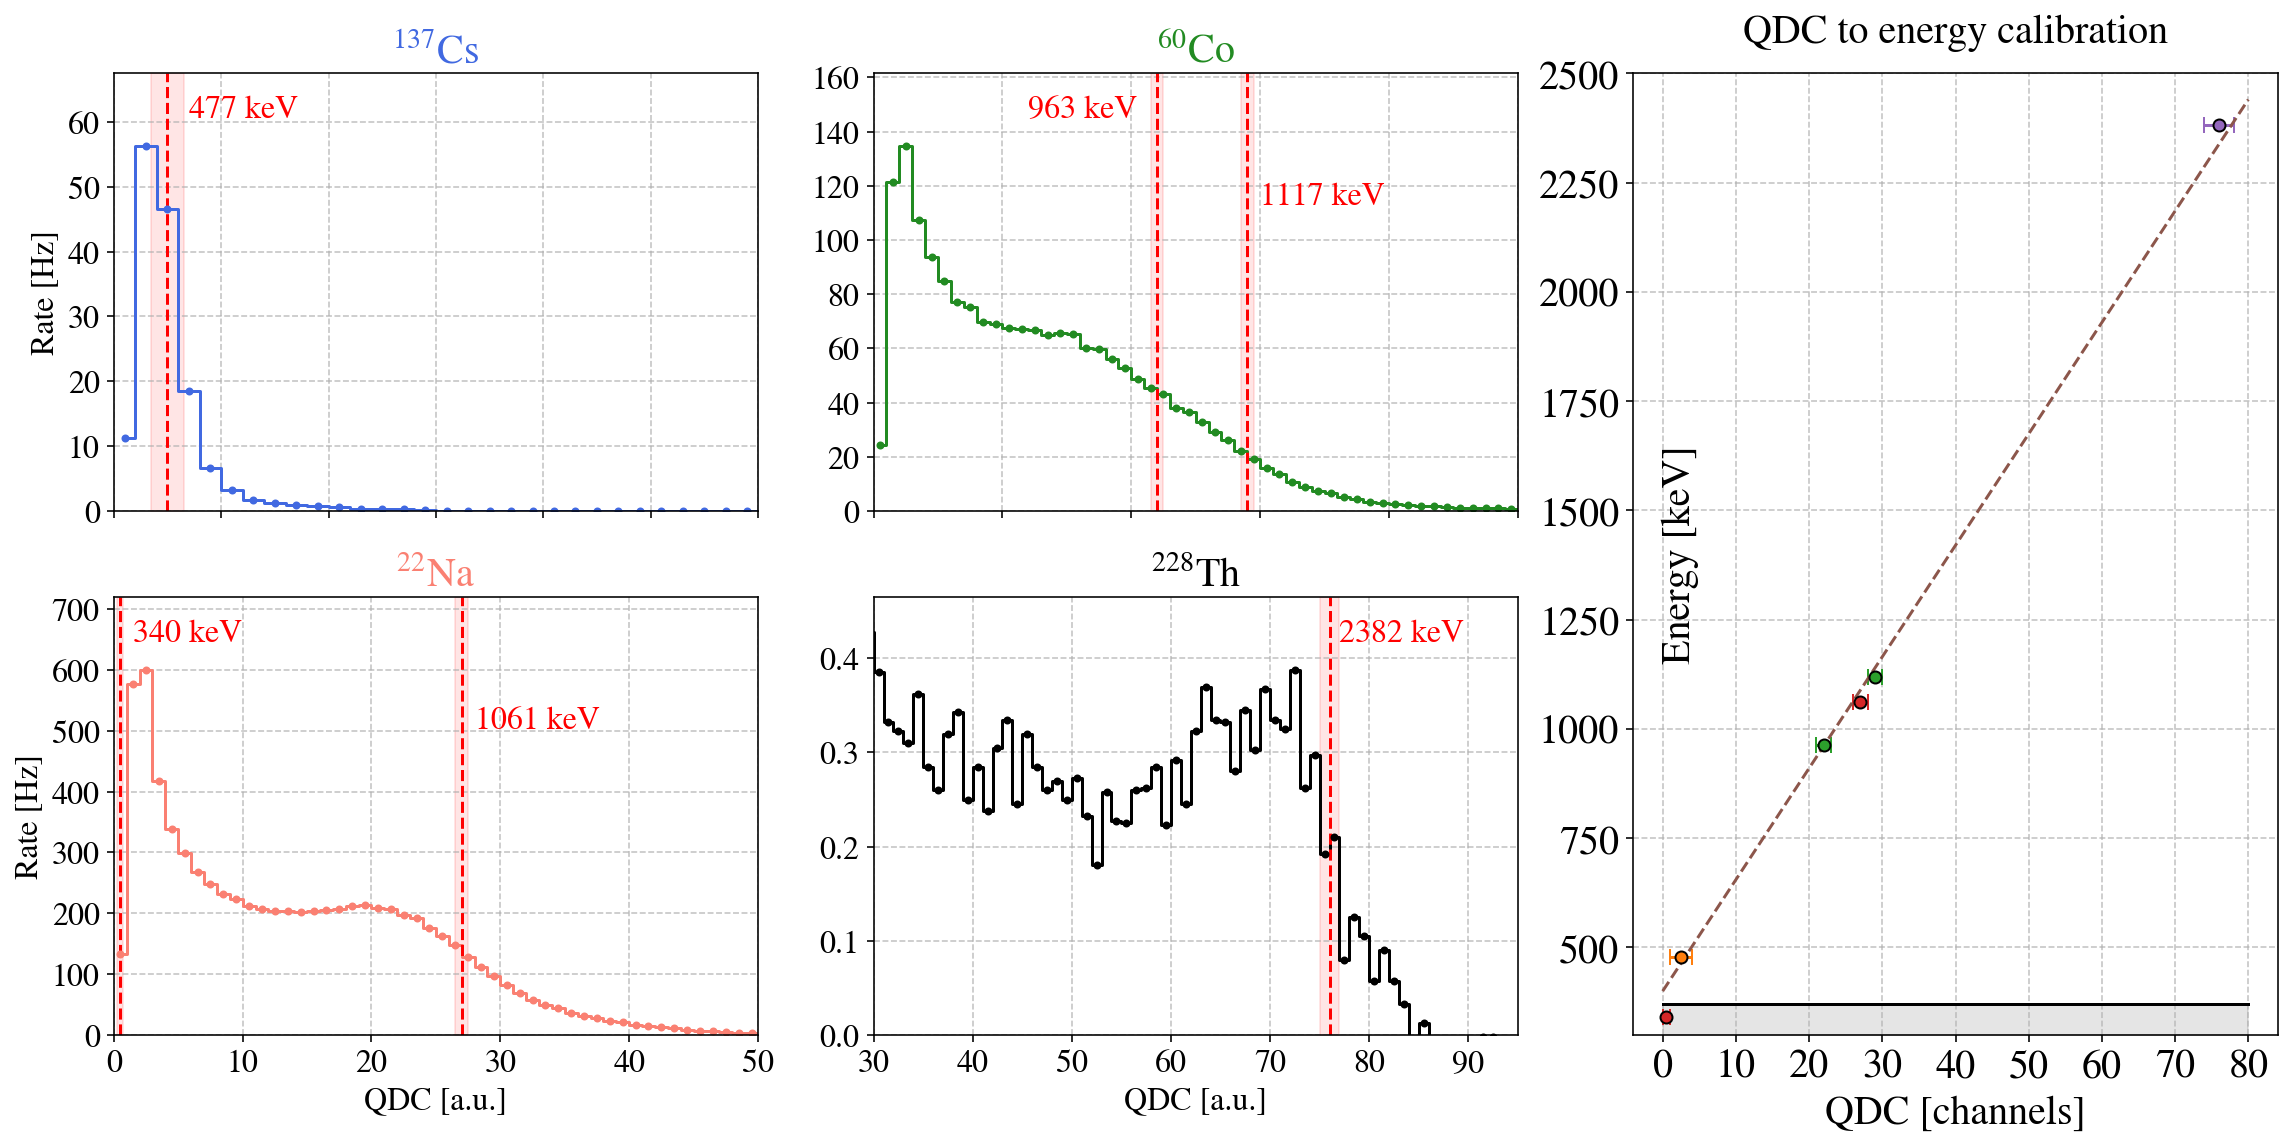

In [12]:
fig = plt.figure(figsize=(16,8))
for (measurement_name,measurement_label,
     color,subplot_idx,
     CE_ch,CE_ch_err,CE_keV,
     xlim,dT) in zip(measurement_names[1:],measurement_labels[1:], 
                  colors[1:],[1,2,4,5],
                  source_CE_ch[1:],source_CE_ch_err[1:],source_CE_keV[1:],
                  QDC_lims[1:],dTs[1:]):#{

    hist    = h[measurement_label+'signal']
    hist_err= herr[measurement_label+'signal']
    
    ax = fig.add_subplot(2,3,subplot_idx)
    plt.step ( x, hist, color=color, where='mid', label=None ) 
    plt.errorbar ( x=x, xerr=x_err, y=hist, yerr=hist_err, 
                  color=color, linestyle='None',
                  label=measurement_label,                                                                          
                  capsize=0,capthick=0,marker='.',linewidth=0 )
    ymax = 1.2*np.max(hist[np.min(xlim):np.max(xlim)])

   # Compton edges
    for CE,CE_err,E,CE_idx in zip(CE_ch,CE_ch_err,CE_keV,range(len(CE_keV))):
        plt.plot([CE,CE],[0,ymax],'--r')
        plt.fill_betweenx([0,ymax],CE-CE_err/2,CE+CE_err/2,color='r',alpha=0.1)
        ytext = (0.9-0.2*CE_idx)*ymax
        xtext = CE+1
        if np.abs(E-963)<1: xtext=xtext-11
        plt.text(xtext,ytext,'%d keV'%E,color='r', fontsize=16)
    #}    
    


    # cosmetics
    set_axes(ax,'QDC [a.u.]' if subplot_idx==4 or subplot_idx==5 else '',
             'Rate [Hz]' if subplot_idx==1 or subplot_idx==4 else '',
             remove_ticks_x = True if subplot_idx==1 or subplot_idx==2 else False,
             xlim=xlim, ylim=(0,ymax),
             title=measurement_label,
             do_add_grid=True,do_add_legend=False,fontsize=16);
    ax.set_title(measurement_label, color=color, fontsize=20)
     
ax = fig.add_subplot(1,3,3)
for (measurement_name,measurement_label,
     color,subplot_idx,
     CE_ch,CE_ch_err,CE_keV) in zip(measurement_names,measurement_labels,                          
                          colors,range(len(colors)),
                          source_CE_ch,source_CE_ch_err,source_CE_keV):#{

    plt.errorbar ( x=CE_ch , y=CE_keV, xerr=CE_ch_err , label=measurement_label,
                  marker='o', markeredgecolor='k', linestyle='None', capsize=4) 
    
plt.plot( QDC , calib_func(QDC,a,b) ,'--' ,label='%.0f keV + %.1f QDC'%(a,b))
plt.plot( [0,np.max(QDC)],[370,370] ,'-k' , label='detection threshold')
plt.fill_between( [0,np.max(QDC)],[300,300],[370,370] ,color='k' , label=None, alpha=0.1)
set_axes(ax,'QDC [channels]','Energy [keV]',
         title='QDC to energy calibration',ylim=(300,2500),
         do_add_grid=True,do_add_legend=False,fontsize=20);
ax.set_ylabel('Energy [keV]',labelpad=-80)

plt.tight_layout()
save_figure('/Users/erezcohen/Desktop/Projects/FNMC/BoxSi/papers/BoxSi_p2.2_NIM_paper/Figures/QDC_energy_Calibration.pdf')